<a href="https://colab.research.google.com/github/lata-web/Twitter-Hate-Speech-Detection/blob/master/text_to_speech_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Mount Google Drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
#important library
import os 
import sys  
import pandas as pd  
from IPython import display as ipd  
import tensorflow 
import tensorflow as tf 
import os

os.getcwd()

import glob
import re
import sqlite3
import csv

import random
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from google.colab import files  

In [4]:
file= files.upload()

In [5]:
test_data = '/content/drive/MyDrive/abdiitext-to-speech.csv'     
df= pd.read_csv(test_data)  
print(df)


        audio                                               text
0  LJ001-0000  Afaanii fi Faayidaa Isaa Afaan meeshaa ilmaan ...
1  LJ001-0001  Fakkeenyaaf; ulaagaalee sabni tokko ittiin bee...
2  LJ001-0002  Kana jechuun; sabni tokko; saba kana jennee sa...
3  LJ001-0003  Kanamalees; afaan aadaa saba isaa ni baata; da...
4  LJ001-0004  Faayidaa guddaan afaanii inni biraa; namoonni ...
5  LJ001-0005  Namni tokko rakkina; gammachuu fi waan kana fa...
6  LJ001-0006  Akkasumas; fedhii fi jibba namoota biraa dhaga...
7  LJ001-0007  Guddinni afaan saba tokkoo guddina hawaasa isa...
8  LJ001-0008  Kana jechuun; bal’innii fi dagaaginni afaan to...
9  LJ001-0009  Qabeenyii fi aadaan saba tokkoo yoo guddachaa ...


In [6]:
# load sample audio file
audio_file = "/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/wavs/LJ001-0000.wav"
audio_transcript = "/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/text/LJ001-0000.txt"

In [7]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/wavs/LJ001-0001.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [45]:
from IPython.display import Audio
Audio('/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/wavs/LJ001-0001.wav')

In [9]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [10]:
wave_audio

array([ 0,  0,  0, ...,  1,  0, -1], dtype=int16)

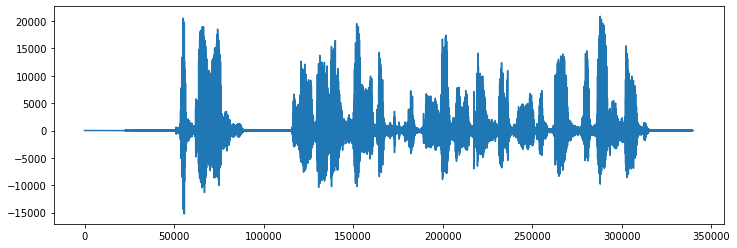

In [11]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [12]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 332)


In [13]:
mfccs

array([[-5.7888586e+02, -5.7888586e+02, -5.7888586e+02, ...,
        -5.4144916e+02, -5.4284845e+02, -5.5096362e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.9249279e+01,  4.7422035e+01,  3.6988029e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.9223892e+01,  3.7725086e+01,  3.0089256e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.5527209e+00,  1.4658654e+00,  1.2647703e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8940017e+00,  1.4291384e+00,  1.2550991e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8490059e+00,  1.2842786e+00,  2.4350443e+00]], dtype=float32)

In [54]:
def features_extractor(file): 
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [42]:
import librosa 
audio_file_path = '/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/wavs/LJ001-0000.wav'
librosa_audio,libros_sample_rate = librosa.load(audio_file_path)

In [43]:
print(librosa_audio)

[ 0.          0.03131104  0.0625     ... -0.09350586 -0.06253052
 -0.03134155]


In [57]:
# load audiofile using librosa
import librosa
signal, sr = librosa.load(audio_file) # signal and sample rate

In [58]:
data, sr = librosa.load(audio_file, sr=16000) 
print(data.shape, sr)

(80000,) 16000


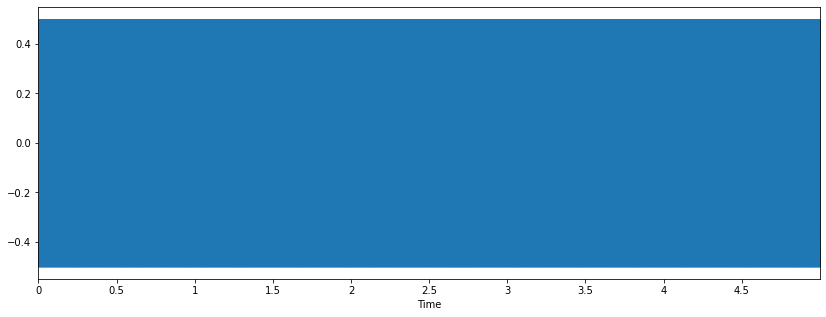

In [59]:
import matplotlib.pyplot as plt  
import librosa.display   
plt.figure(figsize=(14,5))  
librosa.display.waveplot(data, sr=sr)

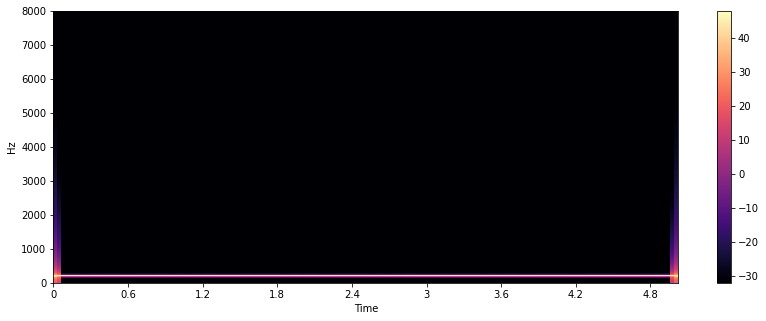

In [60]:
x = librosa.stft(data)  
xdb = librosa.amplitude_to_db(abs(x))  
plt.figure(figsize=(14,5)) 
librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

(157,)


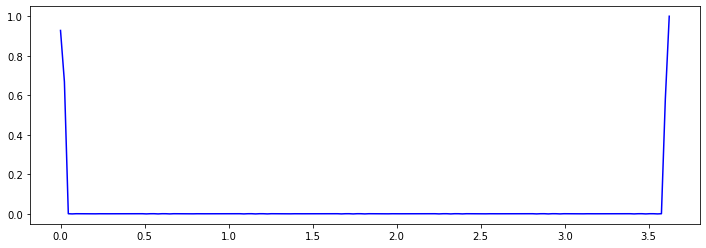

In [61]:
import sklearn 
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
print(spectral_centroids.shape) 
plt.figure(figsize=(12,4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0): 
  return sklearn.preprocessing.minmax_scale(x,axis=axis)
  librosa.display.waveplot(data, sr=sr, alpha=0.4)   
plt.plot(t, normalize(spectral_centroids), color='b')

In [62]:
signal.shape

(110250,)

In [63]:
import torch  
import torchaudio   
waveform, sample_rate = torchaudio.load(audio_file)
waveform.shape, sample_rate

(torch.Size([1, 110250]), 22050)

In [64]:
import torchaudio.transforms as T 
import torchaudio.functional as F 
waveform, sample_rate=torchaudio.load(audio_file)
resample_rate = 32000  
resample_waveform1= F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=12)
resample_waveform2= F.resample(waveform, sample_rate, resample_rate, resampling_method = "kaiser_window")

In [65]:
from scipy.io.wavfile import read   
import numpy    
a= read("/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/wavs/LJ001-0000.wav")  
a = numpy.array(a[1])
print(a)  
#for i in a: 
 # print(i)

[    0  1026  2048 ... -3064 -2049 -1027]


In [66]:
# extract mfcc
mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr=sr)

In [67]:
mfccs.shape

(13, 216)

In [68]:
# get first order and second order derivatives of mfcc
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

# have the same shape as mfccs
delta_mfccs.shape, delta2_mfccs.shape

((13, 216), (13, 216))

In [69]:
files = os.listdir("/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/wavs")
len(files)

1162

In [70]:
def to_mfcc(audio_path, n_mfcc=13):
    '''
    returns: numpy ndarray
    '''
    signal, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(signal, n_mfcc=n_mfcc, sr=sr)

    return mfccs

In [71]:
# create train, dev, test split

files = os.listdir(os.path.join("/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus", "wavs"))

files.sort()  # make sure that the filenames have a fixed order before shuffling
random.seed(230)
random.shuffle(files) # shuffles the ordering of filenames (deterministic given the chosen seed)

split_1 = int(0.8 * len(files))
split_2 = int(0.9 * len(files))

train_filenames = files[:split_1]
dev_filenames = files[split_1:split_2]
test_filenames = files[split_2:]

In [72]:
def preprocess(root_path, files, partition):

    if not os.path.isdir(f"{root_path}/dataset"):
        os.mkdir(f"{root_path}/dataset/")

    if not os.path.isdir(f"{root_path}/dataset/{partition}"):
        os.mkdir(f"{root_path}/dataset/{partition}")
        os.mkdir(f"{root_path}/dataset/{partition}/mfcc")
        os.mkdir(f"{root_path}/dataset/{partition}/transcript")

    for i, file in enumerate(files):
        audio_path = os.path.join(root_path, "wavs", file)

        basename = os.path.splitext(os.path.basename(audio_path))[0]

        transcript_path = os.path.join(
            root_path, "text",
            basename + ".txt"
        )
        
        mfcc = to_mfcc(audio_path)
        transcript = open(transcript_path).read().replace("\n", " ").upper()

        np.save(f"{root_path}/dataset/{partition}/mfcc/{basename}.npy", mfcc)
        np.save(f"{root_path}/dataset/{partition}/transcript/{basename}.npy", np.array(list(transcript)))

        print(i, partition, basename)

In [73]:
len(train_filenames), len(dev_filenames), len(test_filenames)

(929, 116, 117)

In [ ]:
import soundfile as sf
from scipy.io import wavfile
if os.path.isfile("/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/wavs/count.py"):
    os.remove("/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus/wavs/count.py")

preprocess("/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus", train_filenames, partition="train")
preprocess("/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus", dev_filenames, partition="dev")
preprocess("/content/drive/MyDrive/ABEBE DATASET/Afaan_Oromo_corpus", test_filenames, partition="test")

In [82]:
!pip3 install deep_phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for deep-phonemizer: filename=deep_phonemizer-0.0.17-py3-none-any.whl size=29727 sha256=9c2e117cc4d63d8fafc3903cf10667cc5dc7fd1b4f42bd508ae14528ddd662c0
  Stored in directory: /root/.cache/pip/wheels/c0/09/57/64a017d46381d74a6b84869bbf763e3fe8579cc248ac65c651
Successfully built deep-phonemizer


In [74]:
# When running this example in notebook, install DeepPhonemizer
# !pip3 install deep_phonemizer

import torch
import torchaudio
import matplotlib.pyplot as plt

import IPython

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

1.12.1+cu113
0.12.1+cu113


In [76]:
symbols = '_-!\'(),.:;? abcdefghijklmnopqrstuvwxyz'
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)

def text_to_sequence(text):
  text = text.lower()
  return [look_up[s] for s in text if s in symbols]

text = "waaqayyo gaariidha !"
print(text_to_sequence(text))

[34, 12, 12, 28, 12, 36, 36, 26, 11, 18, 12, 12, 29, 20, 20, 15, 19, 12, 11, 2]


In [77]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = "waaqayyo gaariidha!"
processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[34, 12, 12, 28, 12, 36, 36, 26, 11, 18, 12, 12, 29, 20, 20, 15, 19, 12,
          2]])
tensor([19], dtype=torch.int32)


In [79]:
print([processor.tokens[i] for i in processed[0, :lengths[0]]])

['w', 'a', 'a', 'q', 'a', 'y', 'y', 'o', ' ', 'g', 'a', 'a', 'r', 'i', 'i', 'd', 'h', 'a', '!']


In [83]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()

text = "waaqayyo gaariidha!"
with torch.inference_mode():
  processed, lengths = processor(text)

print(processed)
print(lengths)

  0%|          | 0.00/63.6M [00:00<?, ?B/s]

tensor([[92, 12, 64, 48, 93, 69, 11, 53, 12, 78, 59, 55, 38, 20,  2]])
tensor([15], dtype=torch.int32)


In [84]:
print([processor.tokens[i] for i in processed[0, :lengths[0]]])

['W', 'AA', 'K', 'EY', 'Y', 'OW', ' ', 'G', 'AA', 'R', 'IY', 'IH', 'D', 'AH', '!']


Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth


  0%|          | 0.00/107M [00:00<?, ?B/s]

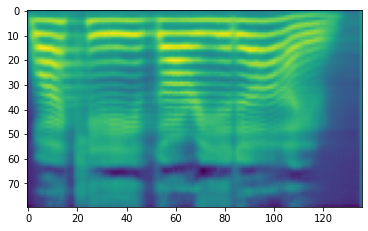

In [85]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)

text = "waaqayyo gaariidha !"

with torch.inference_mode():
  processed, lengths = processor(text)
  processed = processed.to(device)
  lengths = lengths.to(device)
  spec, _, _ = tacotron2.infer(processed, lengths)


plt.imshow(spec[0].cpu().detach())

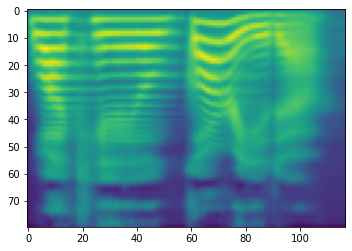

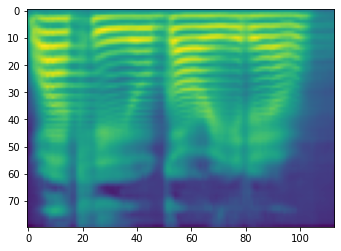

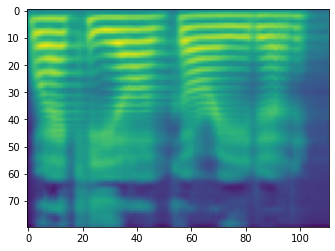

In [86]:
for _ in range(3):
  with torch.inference_mode():
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
  plt.imshow(spec[0].cpu().detach())
  plt.show()

In [87]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = "waaqayyo gaariidha!"

with torch.inference_mode():
  processed, lengths = processor(text)
  processed = processed.to(device)
  lengths = lengths.to(device)
  spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
  waveforms, lengths = vocoder(spec, spec_lengths)

torchaudio.save("output_wavernn.wav", waveforms[0:1].cpu(), sample_rate=vocoder.sample_rate)
IPython.display.display(IPython.display.Audio("output_wavernn.wav"))

Downloading: "https://download.pytorch.org/torchaudio/models/wavernn_10k_epochs_8bits_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/wavernn_10k_epochs_8bits_ljspeech.pth


  0%|          | 0.00/16.7M [00:00<?, ?B/s]

In [90]:
#bundle = torchaudio.pipelines.TACOTRON2_GRIFFINLIM_PHONE_LJSPEECH

#processor = bundle.get_text_processor()
#tacotron2 = bundle.get_tacotron2().to(device)
#vocoder = bundle.get_vocoder().to(device)

#with torch.inference_mode():
 # processed, lengths = processor(text)
 # processed = processed.to(device)
 # lengths = lengths.to(device)
#  spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
#waveforms, lengths = vocoder(spec, spec_lengths)

#torchaudio.save("output_griffinlim.wav", waveforms[0:1].cpu(), sample_rate=vocoder.sample_rate)
#IPython.display.display(IPython.display.Audio("output_griffinlim.wav"))

In [89]:
waveglow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp32')
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to(device)
waveglow.eval()

with torch.no_grad():
  waveforms = waveglow.infer(spec)

torchaudio.save("output_waveglow.wav", waveforms[0:1].cpu(), sample_rate=22050)
IPython.display.display(IPython.display.Audio("output_waveglow.wav"))

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:14: UserWarning: p

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics